# Bayt, Part 2 - Data Processing & Results Display

Project by Lama Kaysi and Varun Hebbar

This part of the project uses the excel sheet created in part 1. It asks the user to rate a number of criteria about homes that are important to them, then processes and displays the information.

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from tkinter import *
import folium
import seaborn as sns

In [2]:
%matplotlib inline

## Getting User Inputs

This part of the code gets the user to provide ratings on a scale of 0 to 5 on all of the following criteria:
1. walk score
2. transit score
3. bike score
4. noise level
5. livability
6. amenities
7. cost of living
8. crime
9. education
10. employment
11. housing
12. weather

The cell directly below this one is used to get the user inputs.

In [3]:
# print('Please rate following criteria on a scale of 0-5')
# print('0 = not important')
# print('5 = very important')

# walklvl = input('Walk Score: ').strip()
# transitlvl = input('Transit Score: ').strip()
# bikelvl = input('Bike Score: ').strip()
# noiselvl = input('Noise Score: ').strip() 
# livabilitylvl = input('Livability').strip()
# amenitieslvl = input('Amenities: ').strip()
# costoflivinglvl = input('Cost of living: ').strip()
# crimelvl = input('Crime level: ').strip()
# educationlvl = input('Education: ').strip()
# employmentlvl = input('Employment: ').strip()
# housinglvl = input('Housing: ').strip()
# weatherlvl = input('Weather: ').strip()

For simplicity of demonstration and to make it quicker to run the code, we assume some values for the user input in the cell below.

In [3]:
# Assuming some rating values

walklvl = 4
transitlvl = 0
bikelvl = 1 
noiselvl = 5 
livabilitylvl = 5
amenitieslvl = 2
costoflivinglvl = 4
crimelvl = 5
educationlvl = 0
employmentlvl = 2
housinglvl = 4
weatherlvl = 2

dictlvl = {'walklvl': walklvl, 'transitlvl':transitlvl, 'bikelvl':bikelvl, 'noiselvl':noiselvl,
          'livabilitylvl':livabilitylvl, 'amenitieslvl':amenitieslvl, 'costoflivinglvl':costoflivinglvl,
          'crimelvl':crimelvl, 'educationlvl':educationlvl, 'employmentlvl':employmentlvl,
          'housinglvl':housinglvl, 'weatherlvl':weatherlvl}


## Processing the Data

The method getDF() takes a filename as a parameter. This is assumed to be an Excel file.

It returns a DataFrame based on the given file.

In [4]:
#Creates a data frame out of an excel file

def getDF(filename):
    xl = pd.ExcelFile(filename)
    df = xl.parse('listings_merge')
    df = df.rename(columns={"score": "noisescore"})
    return df

The method prepDF() takes a dataframe as a parameter.

It changes the columns with letter scores into number scores (out of 100).

It then checks to see if any columns in the dataframe have a the same value for each row, or if they have NaN in each row. In this case, it will let the user know that this criterion did not impact the ratings.

In [5]:
#Prepares the data

def prepDF(df2):
   
    #Change letter grade columns to a score grade out of 100
    lettercol = ['Amenities', 'Cost of Living', 'Crime', 'Education', 'Employment', 'Housing', 'Weather']
    for index, row in df2.iterrows():
        for col in lettercol:
            if df2.at[index, col] == 'A+':
                df2.at[index, col] = 100
            elif df2.at[index, col] == 'A':
                df2.at[index, col] = 96
            elif df2.at[index, col] == 'A-':
                df2.at[index, col] = 92
            elif df2.at[index, col] == 'B+':
                df2.at[index, col] = 89
            elif df2.at[index, col] == 'B':
                df2.at[index, col] = 86
            elif df2.at[index, col] == 'B-':
                df2.at[index, col] = 82
            elif df2.at[index, col] == 'C+':
                df2.at[index, col] = 79
            elif df2.at[index, col] == 'C':
                df2.at[index, col] = 76
            elif df2.at[index, col] == 'C-':
                df2.at[index, col] = 72
            elif df2.at[index, col] == 'D+':
                df2.at[index, col] = 67
            elif df2.at[index, col] == 'D':
                df2.at[index, col] = 66
            elif df2.at[index, col] == 'D-':
                df2.at[index, col] = 62
            elif df2.at[index,col] == 'F':
                df2.at[index, col] = 20
    
    #Check if all values in columns are the same
    #If they are all the same, let user know they didn't impact ranking
    allcol = ['url', 'walkscore', 'transitscore', 'bikescore', 'noisescore', 'Livability', 'Amenities', 'Cost of Living', 'Crime', 'Education', 'Employment', 'Housing', 'Weather']
    for col in allcol:
        uniques = df2[col].nunique()
        if(uniques == 1 or df2[col].isnull().all()):
            print('The value of the ' + col + ' did not impact the ranking. All values were: ' + str(df2.at[index, col]))
            
    return df2

In [6]:
filePitt = 'ApartmentsPitt.xlsx'
full_pitt = getDF(filePitt)

In [7]:
# Prints what variables did not impact the rating and why
full_pitt2 = prepDF(full_pitt)
# Creates a new data frame with the a specific set of columns to be processed
dfPitt = DataFrame(full_pitt,columns=['url','lat','long', 'walkscore', 'transitscore', 'bikescore', 'noisescore', 'Livability', 'Amenities', 'Cost of Living', 'Crime', 'Education', 'Employment', 'Housing', 'Weather'])

The value of the transitscore did not impact the ranking. All values were: nan
The value of the Weather did not impact the ranking. All values were: 86


The method getScores() takes two dicts as input:
1. scores (a dict with the value of the variable e.g. a walk score, a bike score, etc.)
2. dictlvl (a dict with the user-given ratings for the criteria)

It then calculates a score by taking the sum of the product of the value of each criteria and the user-given rating.

In [8]:
# Gets the rating/score for a particular listing

def getScore(scores, dictlvl):
    score = scores['walkscore']*dictlvl['walklvl'] + scores['transitscore']*dictlvl['transitlvl'] + scores['bikescore']*dictlvl['bikelvl'] + scores['noisescore']*dictlvl['noiselvl'] + scores['livabilityscore']*dictlvl['livabilitylvl'] + scores['amenitiesscore']*dictlvl['amenitieslvl'] + scores['costoflivingscore']*dictlvl['costoflivinglvl'] + scores['crimescore']*dictlvl['crimelvl'] + scores['educationscore']*dictlvl['educationlvl'] + scores['employmentscore']*dictlvl['employmentlvl'] + scores['housingscore']*dictlvl['housinglvl'] + scores['weatherscore']*dictlvl['weatherlvl']
    return score

The method addRating() takes a dataframe as a parameter. It iterates through the rows of the data frame and adds a rating for the listing to the data frame. It returns the updated data frame.

In [9]:
#Adds the rating as as column to the data frame

def addRating(df):
    dict = {}
    for index, row in df.iterrows(): #iterates through the rows
        # gets the score for each criteria
        walkscore = row['walkscore']
        transitscore = row['transitscore']
        bikescore = row['bikescore']
        noisescore = row['noisescore']
        livabilityscore = row['Livability']
        amenitiesscore = row['Amenities']
        costoflivingscore = row['Cost of Living']
        crimescore = row['Crime']
        educationscore = row['Education']
        employmentscore = row['Employment']
        housingscore = row['Housing']
        weatherscore = row['Weather']

        # if the score is NaN, then set the score = 0
        if np.isnan(walkscore):
            walkscore=0
        if np.isnan(transitscore):
            transitscore=0
        if np.isnan(bikescore):
            bikescore=0
        if np.isnan(noisescore):
            noisescore=0
        if np.isnan(livabilityscore):
            livabilityscore=0
        if np.isnan(amenitiesscore):
            amenitiesscore=0
        if np.isnan(costoflivingscore):
            costoflivingscore=0
        if np.isnan(crimescore):
            crimescore=0
        if np.isnan(educationscore):
            educationscore=0
        if np.isnan(employmentscore):
            employmentscore=0
        if np.isnan(housingscore):
            housingscore=0
        if np.isnan(weatherscore):
            weatherscore=0

        dictscores = {'walkscore':walkscore, 'transitscore':transitscore, 'bikescore': bikescore,
                     'noisescore':noisescore, 'livabilityscore':livabilityscore, 'amenitiesscore':amenitiesscore,
                     'costoflivingscore':costoflivingscore, 'crimescore':crimescore, 'educationscore':educationscore,
                     'employmentscore':employmentscore, 'housingscore':housingscore, 'weatherscore':weatherscore}

        score = getScore(dictscores, dictlvl) # gets a score/rating for the listing

        dict[index] = score
        df['rating'] = pd.Series(dict) #adds the rating to the given data frame
        
    return df

In [10]:
dfPitt = addRating(dfPitt)
full_pitt2 = addRating(full_pitt)

In [11]:
# some statistics about the rating for the given data
dfPitt['rating'].describe()

count     314.000000
mean     2188.675159
std       201.353907
min      1725.000000
25%      2046.000000
50%      2169.000000
75%      2284.750000
max      2829.000000
Name: rating, dtype: float64

The method topPerdf() takes a dataframe and a percentile value as parameters. It then returns a sorted dataframe with only the top listings in that given percentile.

For example, if per = 90, then it shows listings in the 90th percentile based on the ratings.

In [12]:
def topPerdf(df, per):
   
    per = per/100
    
    top10p = df[df['rating']>df['rating'].quantile(per)]
    return top10p.sort_values(by='rating', ascending = False)

In [13]:
topPerPitt = topPerdf(dfPitt, 95) #get the top 95th percentile listings based on ranking

In [14]:
#Preparing the full dataframe so I can merge additional columns with the ranked data frame
sortedFullPitt = full_pitt2.sort_values(by='rating', ascending = False)
sortedFullPitt.index = range(1,len(sortedFullPitt.index)+1)

In [15]:
#Adding some informative columns
topPerPitt_addCol = topPerPitt.join(DataFrame(sortedFullPitt['address']))
topPerPitt_addCol = topPerPitt_addCol.join(DataFrame(sortedFullPitt['postalCode']))
topPerPitt_addCol = topPerPitt_addCol.join(DataFrame(sortedFullPitt['telephone']))
topPerPitt_addCol = topPerPitt_addCol.join(DataFrame(sortedFullPitt['type']))
topPerPitt_addCol = topPerPitt_addCol.join(DataFrame(sortedFullPitt['neighborhood']))

In [16]:
#maps column name to importance rating given
dictColNameLvl = {'walkscore': walklvl, 'transitscore':transitlvl, 'bikescore':bikelvl, 'noisescore':noiselvl,
          'Livability':livabilitylvl, 'Amenities':amenitieslvl, 'Cost of Living':costoflivinglvl,
          'Crime':crimelvl, 'Education':educationlvl, 'Employment':employmentlvl,
          'Housing':housinglvl, 'Weather':weatherlvl}

In [17]:
lvl5 = []
lvl4 = []
lvl3 = []
lvl2 = []
lvl1 = []
lvl0 = []
for col in dictColNameLvl:
    if dictColNameLvl[col] == 5:
        lvl5.append(col)
    if dictColNameLvl[col] == 4:
        lvl4.append(col)
    if dictColNameLvl[col] == 3:
        lvl3.append(col)
    if dictColNameLvl[col] == 2:
        lvl2.append(col)
    if dictColNameLvl[col] == 1:
        lvl1.append(col)
    if dictColNameLvl[col] == 0:
        lvl0.append(col)

all_lvl = []
all_lvl.append('rating')
all_lvl.append('url')
all_lvl.append('address')
all_lvl.append('lat')
all_lvl.append('long')
all_lvl.append('postalCode')
all_lvl.append('telephone')
all_lvl.append('type')
all_lvl.append('neighborhood')
for x in lvl5:
    all_lvl.append(x)
for x in lvl4:
    all_lvl.append(x)
for x in lvl3:
    all_lvl.append(x)
for x in lvl2:
    all_lvl.append(x)
for x in lvl1:
    all_lvl.append(x)
for x in lvl0:
    all_lvl.append(x)

len5=len(lvl5)+1
len4=len(lvl4)+1
len3=len(lvl3)+1
len2=len(lvl2)+1
len1=len(lvl1)+1
len0=len(lvl0)+1

colName = []
colName.append('')
colName.append('')
colName.append('')
colName.append('')
colName.append('')
colName.append('')
colName.append('')
colName.append('')
colName.append('')
for x in range(1,len5):
    colName.append('5')
for x in range(1,len4):
    colName.append('4')
for x in range(1,len3):
    colName.append('3')
for x in range(1,len2):
    colName.append('2')
for x in range(1,len1):
    colName.append('1')
for x in range(1,len0):
    colName.append('0')

In [18]:
#Adding a column heading that shows the rated importance for each category
final_display_Pitt = topPerPitt_addCol[all_lvl]
arrays = [colName, all_lvl]
final_display_Pitt.columns = pd.MultiIndex.from_arrays(arrays, names=['Imp. Rating',''])
final_display_Pitt.index = range(1,len(final_display_Pitt.index)+1) #have the index as a ranking from 1-length
final_display_Pitt = final_display_Pitt.drop(labels='0', level=0, axis = 1) #drop the columns that were given an importance of 0

In [19]:
#adding a row that shows the local average of the top percentile listings for each category
localAvgRow = [int(topPerPitt['rating'].mean()),'','','','','','','','',
            int(topPerPitt[all_lvl[9]].mean()),int(topPerPitt[all_lvl[10]].mean()),
            int(topPerPitt[all_lvl[11]].mean()),int(topPerPitt[all_lvl[12]].mean()),
            int(topPerPitt[all_lvl[13]].mean()),int(topPerPitt[all_lvl[14]].mean()),
            int(topPerPitt[all_lvl[15]].mean()),int(topPerPitt[all_lvl[16]].mean()),
            int(topPerPitt[all_lvl[17]].mean()),int(topPerPitt[all_lvl[18]].mean())]
final_display_Pitt.loc['Local Avg'] = localAvgRow

#adding a row that shows the overall average of the listings for each category
overallAvgRow = [int(sortedFullPitt['rating'].mean()),'','','','','','','','',
            int(sortedFullPitt[all_lvl[9]].mean()),int(sortedFullPitt[all_lvl[10]].mean()),
            int(sortedFullPitt[all_lvl[11]].mean()),int(sortedFullPitt[all_lvl[12]].mean()),
            int(sortedFullPitt[all_lvl[13]].mean()),int(sortedFullPitt[all_lvl[14]].mean()),
            int(sortedFullPitt[all_lvl[15]].mean()),int(sortedFullPitt[all_lvl[16]].mean()),
            int(sortedFullPitt[all_lvl[17]].mean()),int(sortedFullPitt[all_lvl[18]].mean())]
final_display_Pitt.loc['Overall Avg'] = overallAvgRow

In [20]:
def getMap(df):
    loc = []
    for index, row in df.iterrows():
        details = {'lat':row['lat'],'long':row['long'],'url':row['url'],'address':row['address'],'rating':row['rating'],'telephone':row['telephone']}
        loc.append(details)
    
    folium_map = folium.Map(location=[loc[0]['lat'], loc[0]['long']])
    
    for i in range(1,len(loc)):
    
                    
        listing_detail = folium.Html(('Listing URL: ' + '<a href="' + loc[i]['url'] + '"target="_blank">'+ re.sub(r"[']+", "\\\\'", str(loc[i]['url'])[:45]) +'</a>'+ '<br>'+
                         'Rating: ' + str(loc[i]['rating'])+ '<br>'+
                         'Address: ' + loc[i]['address']+ '<br>'+
                         'Telephone: ' + str(loc[i]['telephone'])),script=True)
        
        folium.Marker(location=[loc[i]['lat'], loc[i]['long']],popup=folium.Popup(listing_detail)).add_to(folium_map)
    folium_map.fit_bounds(folium_map.get_bounds())
    return folium_map

In [21]:
#Creates a histogram of all listings for a selected column and highlights the ones that we display in red

def getHistoHighlight(title, column, reg, topPer):
    col = reg[column].dropna().tolist()
    topPercol = topPer[column].dropna().tolist()

    try:
        x = sns.distplot(col, bins=10, kde=False, rug=True)
        #Highlight the results we are showing them
        x.axvspan(min(topPercol), max(topPercol), color='red', alpha=0.5)
        x.set(xlabel = title ,ylabel = "Frequency")
        x.set_title(title + ' Historgram')
        return plt.show()
    
    except:
        print('could not plot ' + column)

In [24]:
# Creates a correlation plot between all the features

def getCorrPlot(df):
    d = df.iloc[ :, 3:-1]
    d = d.fillna(value = 0)
    f, ax = plt.subplots(figsize=(10, 8))
    corr = d.corr()
    x = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
                square=True, ax=ax)
    x.set_xticklabels(x.get_xticklabels(),rotation = 45)
    return plt.show()



## Displaying the Results to the User

### A Table Format

The data frame displayed below shows the user some useful information about each of the listings in the top specified percentile. It is a ranked listing.

At the bottom of the table, there are also averages for the ranking and each of the criteria based on:
- Local average (i.e. from the top percentile)
- Overall average (i.e. from all the resulting listings that matched the initial search)

In [22]:
#The data frame to be displayed to the user
final_display_Pitt

Imp. Rating                                                             \
             rating                                                url   
1            2829.0  https://www.apartments.com/582-peebles-st-pitt...   
2            2732.0  https://www.apartments.com/1215-shady-ave-pitt...   
3            2704.0  https://www.apartments.com/5706-darlington-rd-...   
4            2704.0  https://www.apartments.com/5700-darlington-rd-...   
5            2704.0  https://www.apartments.com/5700-darlington-rd-...   
6            2684.0  https://www.apartments.com/5710-beacon-st-pitt...   
7            2684.0  https://www.apartments.com/5710-beacon-st-pitt...   
8            2672.0  https://www.apartments.com/2112-murray-ave-pit...   
9            2649.0  https://www.apartments.com/5619-melvin-st-pitt...   
10           2648.0  https://www.apartments.com/6317-phillips-ave-p...   
11           2648.0  https://www.apartments.com/6327-waldron-st-pit...   
12           2643.0  https://www.apartments.com/6313-phillips-ave-p...   
13           2642.0  https://www.apartments.com/5552-phillips-ave-p...   
14           2637.0  https://www.apartments.com/2283-shady-ave-pitt...   
15           2637.0  https://www.apartments.com/2261-shady-ave-pitt...   
16           2634.0  https://www.apartments.com/2110-wendover-pl-pi...   
Local Avg    2678.0                                                      
Overall Avg  2188.0                                                      

Imp. Rating                                                       \
                            address      lat     long postalCode   
1                     138 S 24th St    40.44 -79.8948      15203   
2                  970 Elizabeth St  40.4472 -79.9211      15221   
3                      1818 Mary St  40.4366 -79.9246      15203   
4                    3617 Dawson St  40.4372 -79.9246      15213   
5                734 S Millvale Ave  40.4372 -79.9246      15213   
6                    1213 Shady Ave  40.4343 -79.9242      15232   
7                734 S Millvale Ave  40.4343 -79.9242      15213   
8                  132 Southern Ave  40.4333 -79.9232      15211   
9                  1417 Bellaire Pl  40.4305 -79.9267      15226   
10                    1122 Sarah St  40.4326 -79.9175      15203   
11                    250 Alries St  40.4319  -79.917      15210   
12                     90 S 22nd St  40.4327 -79.9177      15203   
13           200 Cliffside Manor Dr  40.4308 -79.9278      15202   
14                  11513 Althea Dr   40.431 -79.9191      15235   
15                 2112 Pauline Ave  40.4314 -79.9184      15216   
16                  5209 Columbo St  40.4317 -79.9294      15224   
Local Avg                                                          
Overall Avg                                                        

Imp. Rating                                                               \
                   telephone                   type         neighborhood   
1            +1-412-904-1083  SingleFamilyResidence     South Side Flats   
2            +1-724-996-6683  SingleFamilyResidence           Pittsburgh   
3            +1-412-727-8599       ApartmentComplex     South Side Flats   
4            +1-412-620-6373       ApartmentComplex      Central Oakland   
5            +1-844-730-2032       ApartmentComplex           Bloomfield   
6            +1-412-271-5550  SingleFamilyResidence  Squirrel Hill North   
7            +1-844-680-2972       ApartmentComplex           Bloomfield   
8            +1-412-212-3261  SingleFamilyResidence     Mount Washington   
9            +1-724-900-2364  SingleFamilyResidence            Brookline   
10           +1-724-918-4499  SingleFamilyResidence     South Side Flats   
11           +1-412-242-1400  SingleFamilyResidence              Carrick   
12           +1-412-545-5797  SingleFamilyResidence     South Side Flats   
13           +1-844-264-3671       ApartmentComplex        United States   
14           +1-41

### An Interactive Map Format

This map below displays the listings in the top specified percentile. If a user clicks on one of the pins, it will display further information about that listing as well a hyperlink to the source listing where they can find further information.

In [23]:
listing_map = getMap(topPerPitt_addCol)
listing_map

### Visualizations

This part of the code will display some informative visualizations about the results.

The first chart displays the distribution of ratings in all the resulting listings, while highlighting the homes in the top specified percentile in red.

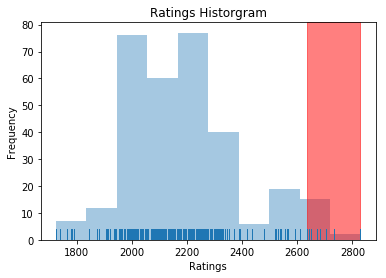

In [25]:
getHistoHighlight('Ratings', 'rating', dfPitt, topPerPitt)

The following charts display the distribution of scores for all the criteria they rated on in all the resulting listings, while highlighting the homes in the top specified percentile in red.

This allows the user to see where the homes that were displayed to them lie with respect to the state of homes in general.

It also displays the rating that they gave the homes for reference.

Importance of walkscore was rated as: 4


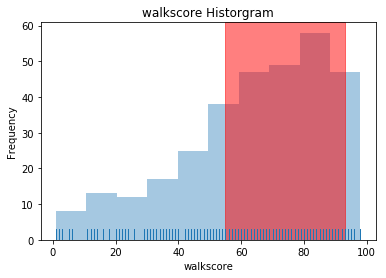

Importance of bikescore was rated as: 1


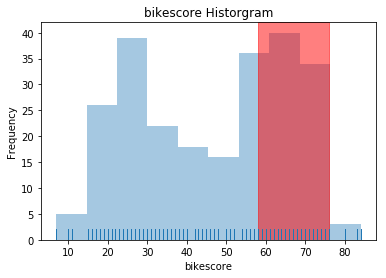

Importance of noisescore was rated as: 5


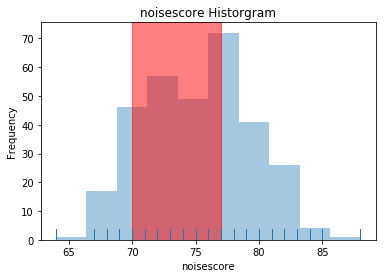

Importance of Livability was rated as: 5


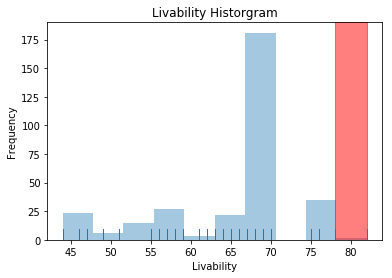

Importance of Amenities was rated as: 2


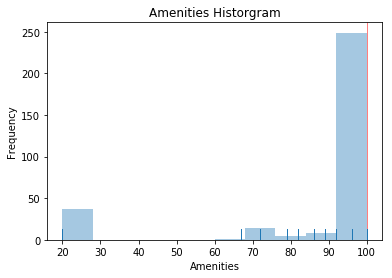

Importance of Cost of Living was rated as: 4


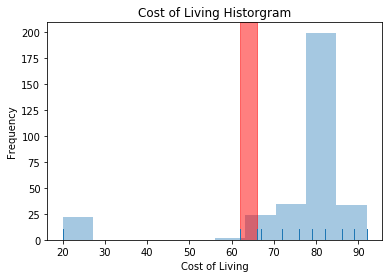

Importance of Crime was rated as: 5


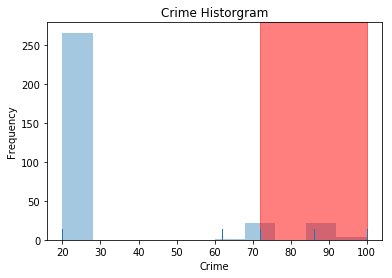

Importance of Employment was rated as: 2


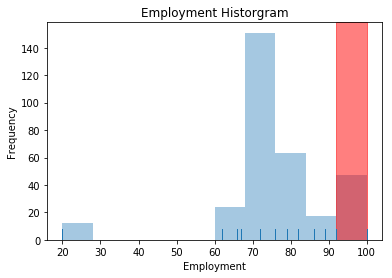

Importance of Housing was rated as: 4


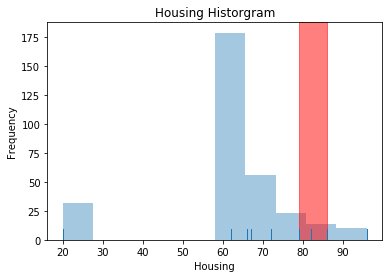

Importance of Weather was rated as: 2


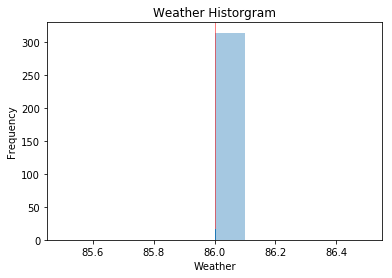

In [26]:
for key, value in dictColNameLvl.items():
    if value != 0:
        print('Importance of '+ key + ' was rated as: ' + str(value))
        getHistoHighlight(key, key, dfPitt, topPerPitt)

The following plot shows the correlation between the features. This helps in knowing the strength and relationship between various features that the application offers. Some features are positively correlated to one another and some are negatively correlated.

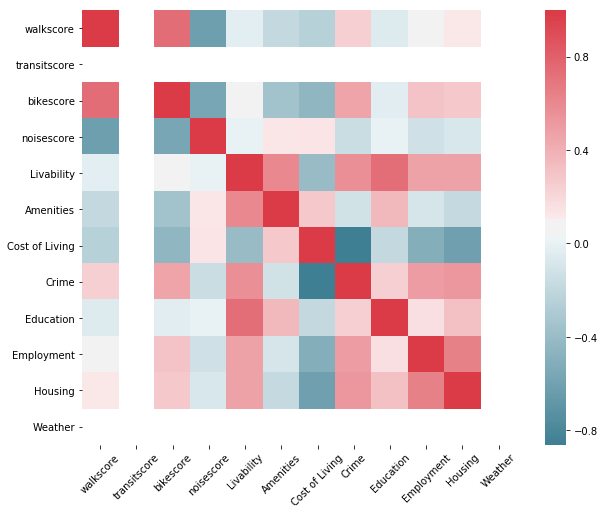

In [25]:
getCorrPlot(dfPitt)